<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - TRỰC QUAN HOÁ DỮ LIỆU - TIME SERIES 📌
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Giai đoạn 2.2 - EDA (tiếp) 📌
</div>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px

warnings.simplefilter('ignore')

### Đọc dữ liệu

In [2]:
df = pd.read_csv('./data/Water_Cleaner_2.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

Trong thời đại biến đổi khí hậu và tình trạng khan hiếm nước ngày càng gia tăng, việc hiểu biết về tài nguyên nước trở nên quan trọng hơn bao giờ hết. Với sự phát triển của khoa học dữ liệu và trí tuệ nhân tạo, có nhiều con đường mới để tiếp cận những vấn đề này.
#
Sau khi đã có biểu đồ, chúng ta có thể nhận xét về xu hướng và biến động của mức độ sâu của nguồn nước ngầm qua thời gian. Đồng thời, có thể đặt ra câu hỏi về những yếu tố nào có thể ảnh hưởng đến sự biến động này và liệu chúng ta có thể dự đoán được tương lai hay không. Tiếp theo, chúng ta có thể tạo các biểu đồ khác để khám phá các mối quan hệ và biến đổi khác trong dữ liệu.
#
Depth_to_Groundwater_P24 and Depth_to_Groundwater_P25 are completely correlated, and therefore averaged values can be used. There is a strange dip in monthly temperatures for Temperature_Petrignano in 2015. This is most likely due to missing values since, in general, the dynamics are almost identical to Temperature_Bastia_Umbra. The same dip is seen in the Hydrometry metric.
#
Most of all (judging by the graphs and correlation indices) Depth_to_Groundwater_P24 and Depth_to_Groundwater_P25 are affected by the drainage volume (Volume_C10). 
In 2008 and 2012, a significant increase in groundwater depth was observed. In 2012, there was a significant decrease in rainfall that also accompanied by a change in drainage volume. After 2012 up to 2014, with an increase in annual rainfall, the depth of groundwater and drainage volume became less that looks logical. There is no rainfall data for 2008.
#
Description: The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.
#
info about Aquifer Petrignano from data description as below

The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.
#
Features:

Rainfall indicates the quantity of rain falling (mm)
2. Temperature indicates the temperature (°C)

3. Volume indicates the volume of water taken from the drinking water treatment plant

4. Hydrometry indicates the groundwater level (m)

Target:

Depth to Groundwater indicates the groundwater level (m from the ground floor)
#
Chọn biểu đồ cần giải thích tính phù hợp với tính chất trường dữ liệu.
Có thể sử dụng nhiều hơn 1 loại biểu đồ cho trường dữ liệu nhưng cần giải thích lí
do.
Sử dụng màu sắc để thể hiện dữ liệu, giải thích ý nghĩa các màu và tại sao mình sử dụng màu như vậy. Sau khi bổ sung màu, nhóm sinh viên có rút ra thêm ý nghĩa gì không?
Thể hiện trực quan một số dữ liệu biến đối theo thời gian. Rút ra ý nghĩa.

### Câu 1: Thể Tích Dòng Chảy, Mực Nước Ngầm, Nhiệt Độ, Thủy Văn Sông và Lượng Mưa Đã Thay Đổi Như Thế Nào Theo Thời Gian Tại Vùng Petrignano?

**Mục đích:**
- Mục đích chính của việc trực quan hóa này là cung cấp cái nhìn toàn diện và chi tiết về sự thay đổi của các thuộc tính quan trọng theo thời gian. Điều này giúp chúng ta hiểu rõ hơn về sự biến đổi của các yếu tố trong tập dữ liệu và có cái nhìn tổng quan về cách chúng tương tác theo thời gian, qua đó hỗ trợ trong việc ra quyết định và đề xuất các biện pháp bảo tồn nước hiệu quả.

**Các thuộc tính sử dụng:**
- Date: Đại diện cho thời gian (ngày/tháng/năm) khi dữ liệu được thu thập.
- Drainage_Volume: Đại diện cho lượng thoát nước (m3) tại mỗi thời điểm.
- Depth_to_Groundwater: Đại diện cho độ sâu đến nước dưới đất (m) tại mỗi thời điểm.
- Temperature: Đại diện cho nhiệt độ (°C) tại mỗi thời điểm.
- River_Hydrometry: Đại diện cho lưu lượng nước sông (m) tại mỗi thời điểm.
- Rainfall: Đại diện cho lượng mưa (mm) tại mỗi thời điểm.

**Biểu đồ sử dụng:** biểu đồ đường (line chart).

**Lý do sử dụng:**
- Biểu đồ đường thường được sử dụng để trực quan hóa sự thay đổi của một biến số theo thời gian. Trong trường hợp này, mỗi biểu đồ đường đại diện cho một thuộc tính cụ thể và biểu thị sự biến đổi của thuộc tính đó qua các điểm dữ liệu được nối với nhau bằng các đoạn thẳng.
- Việc sử dụng biểu đồ đường trong đoạn mã trên là phù hợp vì chúng ta muốn theo dõi sự biến đổi của các thuộc tính quan trọng theo thời gian, bao gồm lượng nước thoát ra, độ sâu đến nguồn nước dưới đất, nhiệt độ, lưu lượng nước sông và lượng mưa. Biểu đồ đường giúp hiển thị mô hình hoặc xu hướng biến đổi của các thuộc tính này một cách rõ ràng và dễ hiểu.

In [3]:
# 1. Drainage Volume Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Drainage_Volume'],
                         mode='lines', name='Drainage Volume'))
fig.update_layout(title='Drainage Volume Over Time', xaxis_title='Date', yaxis_title='Drainage Volume (m3)')
fig.show()

# 2. Depth to Groundwater Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Depth_to_Groundwater'],
                         mode='lines', name='Depth to Groundwater'))
fig.update_layout(title='Depth to Groundwater Over Time', xaxis_title='Date', yaxis_title='Depth to Groundwater (m)')
fig.show()

# 3. Temperature Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Temperature'],
                         mode='lines', name='Temperature'))
fig.update_layout(title='Temperature Over Time', xaxis_title='Date', yaxis_title='Temperature (°C)')
fig.show()

# 4. River Hydrometry Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['River_Hydrometry'],
                         mode='lines', name='River Hydrometry'))
fig.update_layout(title='River Hydrometry Over Time', xaxis_title='Date', yaxis_title='River Hydrometry (m)')
fig.show()

# 5. Rainfall Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Rainfall'],
                         mode='lines', name='Rainfall'))
fig.update_layout(title='Rainfall Over Time', xaxis_title='Date', yaxis_title='Rainfall (mm)')
fig.show()

**Nhận xét:**
- Độ sâu đến nguồn nước dưới đất đạt giá trị cao nhất vào khoảng tháng 5/6 và giá trị thấp nhất vào khoảng tháng 11/12.
- Nhiệt độ đạt giá trị cao nhất vào khoảng tháng 8 và giá trị thấp nhất vào khoảng tháng 1.
- Lượng nước thoát ra đạt giá trị cao nhất vào khoảng tháng 6 và giá trị thấp nhất vào khoảng tháng 8/9. Nó mất thời gian lâu hơn để đạt giá trị cao nhất so với việc đạt giá trị thấp nhất.
- Lưu lượng nước sông đạt giá trị cao nhất vào khoảng tháng 3 và giá trị thấp nhất vào khoảng tháng 9.
- Lượng nước thoát ra và lưu lượng nước sông đạt giá trị thấp nhất vào khoảng cùng một thời điểm.
- Lượng nước thoát ra và lưu lượng nước sông đạt giá trị thấp nhất khi nhiệt độ đạt giá trị cao nhất.
- Nhiệt độ chậm hơn độ sâu đến nguồn nước dưới đất khoảng 2 đến 3 tháng.

### Câu 2: Tính Trend Và Tính Mùa Vụ Của Các Thuộc Tính Diễn Ra Như Thế Nào?

**Mục đích:**
- phân tích mô hình mùa của các biến quan trọng như mực nước dưới đất (Depth_to_Groundwater), nhiệt độ (Temperature), lưu lượng xả thải (Drainage_Volume), lưu lượng nước của sông (River_Hydrometry), và lượng mưa (Rainfall) trong dữ liệu Aquifer Petrignano theo từng tháng và từng năm. Điều này giúp chúng ta hiểu rõ hơn về sự biến đổi của các biến theo mùa, từ đó có thể đưa ra các quyết định và biện pháp bảo vệ và quản lý tài nguyên nước hiệu quả.

**Các thuộc tính sử dụng:**
- Date: Đại diện cho thời gian (ngày/tháng/năm) khi dữ liệu được thu thập.
- Drainage_Volume: Đại diện cho lượng thoát nước (m3) tại mỗi thời điểm.
- Depth_to_Groundwater: Đại diện cho độ sâu đến nước dưới đất (m) tại mỗi thời điểm.
- Temperature: Đại diện cho nhiệt độ (°C) tại mỗi thời điểm.
- River_Hydrometry: Đại diện cho lưu lượng nước sông (m) tại mỗi thời điểm.
- Rainfall: Đại diện cho lượng mưa (mm) tại mỗi thời điểm.

**Biểu đồ sử dụng:** biểu đồ heatmap

**Lý do sử dụng:**
- Heatmap được sử dụng để hiển thị mối quan hệ giữa các biến theo thời gian (tháng và năm). Cung cấp cái nhìn tổng quát về trend và tính mùa vụ của từng thuộc tính.
- Đối với các thuộc tính như 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', heatmap được sử dụng để hiển thị giá trị trung bình của các thuộc tính này theo từng tháng và từng năm.
- Đối với thuộc tính 'Rainfall', heatmap được sử dụng để hiển thị tổng lượng mưa theo tháng và năm.
- Sử dụng màu sắc để thể hiện mức độ giá trị của từng ô trên heatmap, giúp dễ dàng nhận biết và phân tích mối quan hệ giữa các biến theo thời gian.

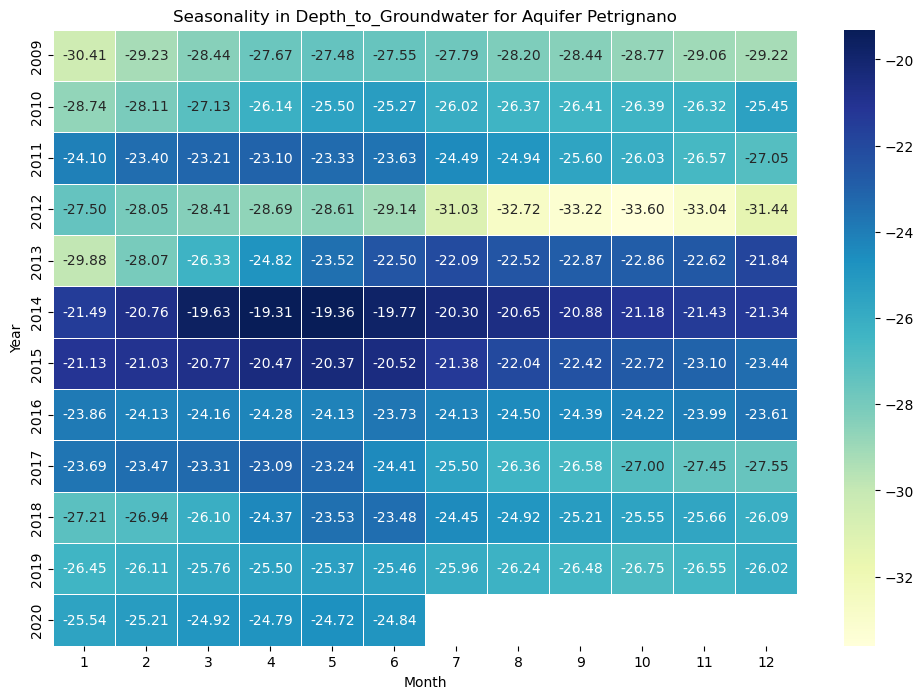

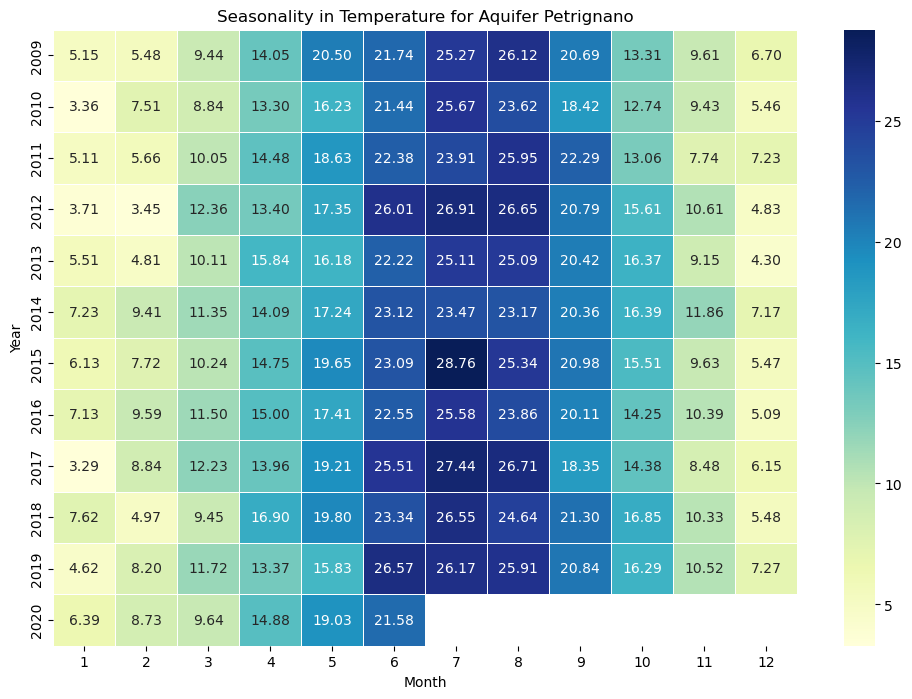

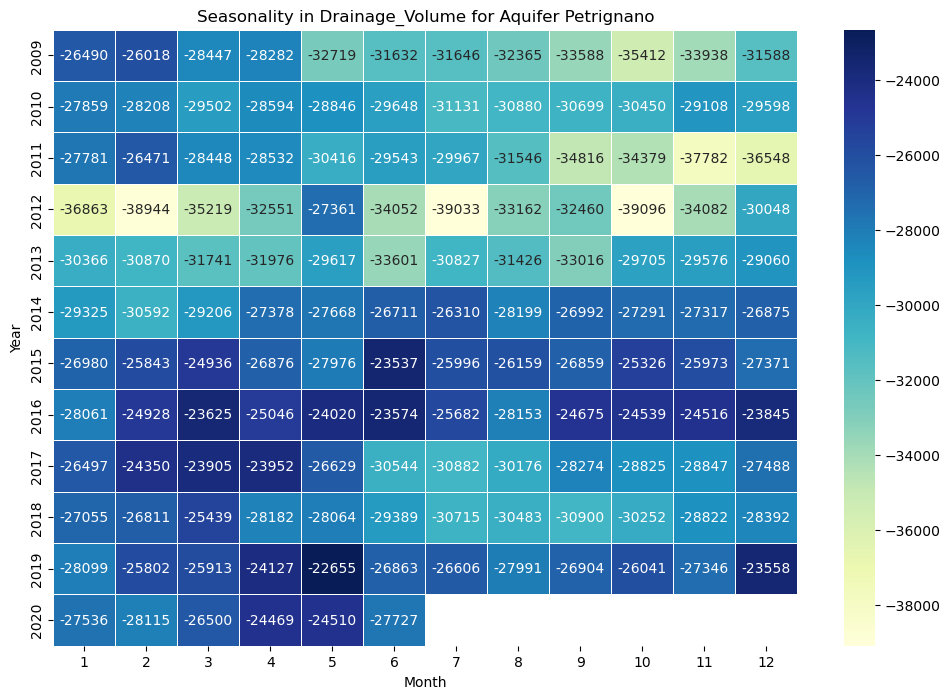

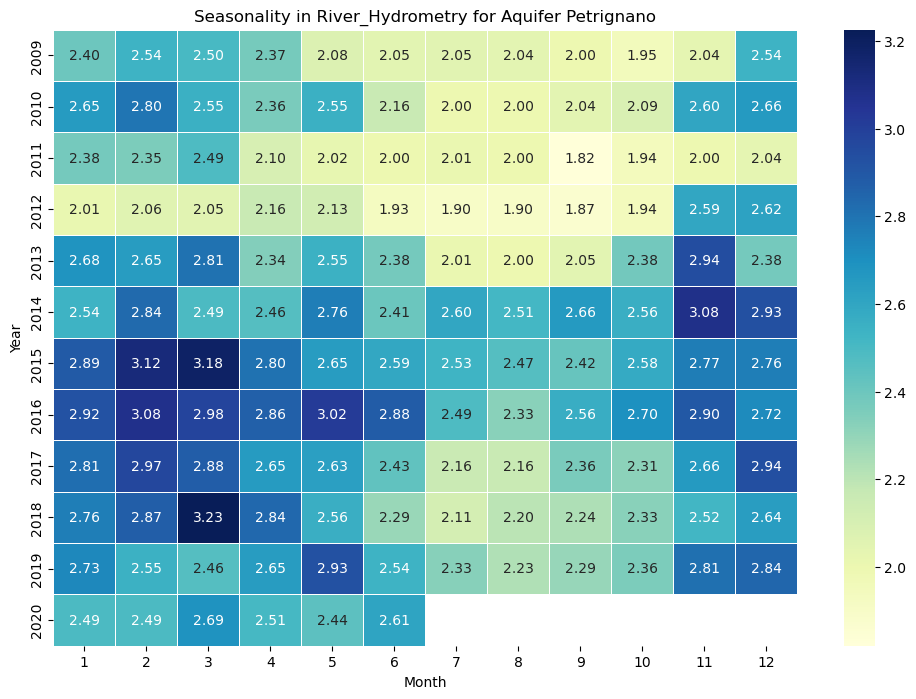

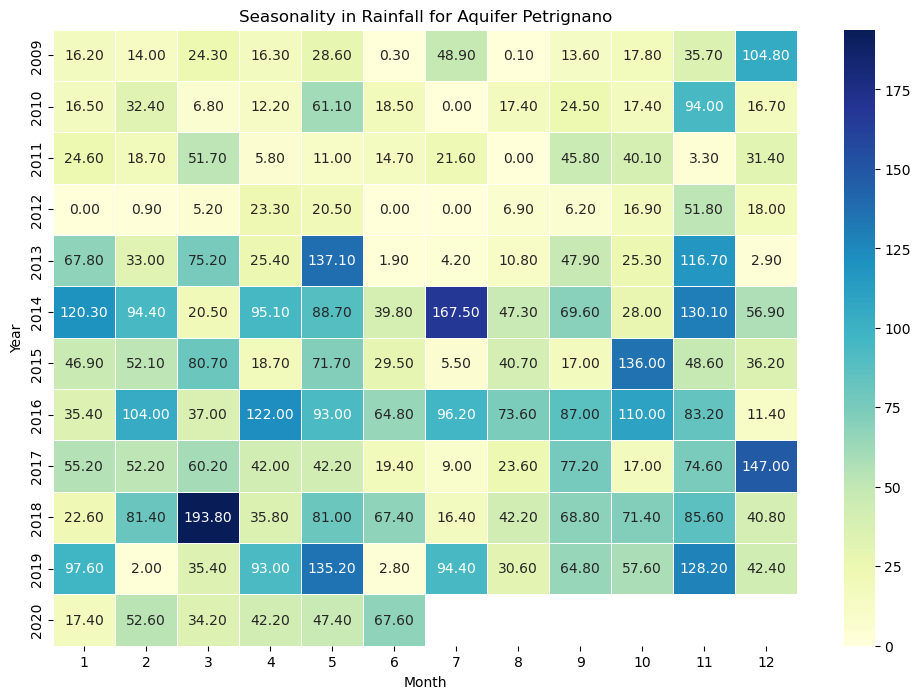

In [4]:
df_new = df[['Date', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', 'Rainfall']]
df_new['Month'] = df_new['Date'].dt.month
df_new['Year'] = df_new['Date'].dt.year

heatmap_data = {}
for value in ['Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', 'Rainfall']:
    if value == 'Rainfall':
        heatmap_data[value] = df_new.pivot_table(values=value, index='Year', columns='Month', aggfunc='sum')
    else:
        heatmap_data[value] = df_new.pivot_table(values=value, index='Year', columns='Month', aggfunc='mean')
        
for value in heatmap_data:
    plt.figure(figsize=(12, 8))
    if value == 'Drainage_Volume':
        sns.heatmap(heatmap_data[value].round(0), cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
    else:
        sns.heatmap(heatmap_data[value], cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
    plt.title(f'Seasonality in {value} for Aquifer Petrignano')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

**Nhận xét:**
- Xu hướng chung (Trend):
    - Mực nước ngầm (Depth_to_Groundwater):
        + Xu hướng giảm từ năm 2009 đến năm 2014 có thể phản ánh sự khô hạn trong khu vực hoặc tăng cường sử dụng nước ngầm cho các mục đích công nghiệp và nông nghiệp.
        + Sự ổn định từ năm 2014 đến 2016 có thể kết hợp với các biện pháp bảo vệ môi trường hoặc giảm sử dụng nước ngầm.
        + Tăng trở lại từ năm 2017 đến 2019 có thể là do gia tăng nhu cầu sử dụng nước ngầm hoặc sự thay đổi trong các mô hình thời tiết và mưa lớn hơn.
    - Nhiệt độ (Temperature):
        + Mặc dù không có xu hướng chung rõ ràng, nhưng có thể quan sát thấy sự biến động theo mùa trong nhiệt độ.
        + Sự tăng dần của nhiệt độ theo thời gian có thể là dấu hiệu của biến đổi khí hậu hoặc tác động của hoạt động con người đối với môi trường.
    - Thể tích xả (Drainage_Volume):
        + Biến động lớn từ năm này sang năm khác có thể phản ánh sự biến động trong việc quản lý nguồn nước, sự gia tăng hoặc giảm thiểu lượng nước xả, hoặc biến đổi trong môi trường sống.
    - Tỷ trọng kế chỉ mực nước (River_Hydrometry):
        + Sự ổn định từng năm có thể phản ánh sự ổn định trong lưu lượng nước sông, hoặc sự ổn định trong việc sử dụng và quản lý tài nguyên nước.
    - Lượng mưa (Rainfall):
        + Biến động mạnh mẽ từng năm có thể là kết quả của biến đổi khí hậu hoặc các yếu tố tự nhiên khác như các cơn bão, El Niño, hoặc La Niña.
        + Có thể quan sát thấy sự tăng hoặc giảm đột ngột trong lượng mưa trong một vài năm, điều này có thể ảnh hưởng đến mực nước ngầm và các hệ thống thủy lợi trong khu vực.
- Mùa vụ (Seasonality):
    - Mực nước ngầm (Depth_to_Groundwater):
        + Có thể quan sát thấy sự biến động theo mùa trong mực nước ngầm.
        + Thường thì vào mùa hè (từ tháng 6 đến tháng 8), mực nước ngầm thường cao hơn do lượng mưa lớn và sự chảy vào của nước mưa.
        + Ngược lại, vào các tháng mùa đông (từ tháng 12 đến tháng 2), mực nước ngầm thường thấp nhất do lượng mưa ít và sự cần cù của cây trồng ít hơn.
    - Nhiệt độ (Temperature):
        + Nhiệt độ thường biến động theo mùa trong năm.
        + Thường thì vào mùa hè (từ tháng 6 đến tháng 8), nhiệt độ cao nhất do ảnh hưởng của ánh nắng mặt trời lớn và lượng nhiệt được lưu giữ trong đất.
        + Trái lại, vào mùa đông (từ tháng 12 đến tháng 2), nhiệt độ thường thấp nhất do ít ánh nắng mặt trời và sự ngưng tụ của không khí lạnh.
    - Thể tích xả (Drainage_Volume):
        + Có thể quan sát thấy sự biến động trong thể tích xả theo mùa.
        + Thường thì vào mùa mưa (từ tháng 6 đến tháng 8), thể tích xả lớn hơn do lượng mưa lớn và sự cần thiết để kiểm soát lượng nước dư thừa.
        + Ngược lại, vào mùa khô (từ tháng 12 đến tháng 2), thể tích xả thường ít hơn do lượng mưa ít và nhu cầu sử dụng nước thấp hơn.
    - Tỷ trọng kế chỉ mực nước (River_Hydrometry):
        + Sự biến động theo mùa trong tỷ trọng kế chỉ mực nước thường phản ánh sự thay đổi trong lưu lượng nước sông.
        + Thường thì vào mùa mưa, lượng nước trong sông sẽ tăng, do đó tỷ trọng kế chỉ mực nước cũng sẽ tăng.
        + Ngược lại, vào mùa khô, lượng nước trong sông giảm, tỷ trọng kế chỉ mực nước cũng giảm theo.
    - Lượng mưa (Rainfall):
        + Lượng mưa thường có sự biến động theo mùa.
        + Thường thì vào mùa mưa (từ tháng 6 đến tháng 8), lượng mưa lớn nhất do ảnh hưởng của các hệ thống thời tiết và cơn bão.
        + Ngược lại, vào mùa khô (từ tháng 12 đến tháng 2), lượng mưa ít hơn do ít hơn hoạt động của các hệ thống thời tiết.
- Sự giảm dần của mực nước ngầm trong giai đoạn đầu có thể liên quan đến sự sử dụng không cân nhắc và quá mức của nguồn nước ngầm, cùng với yếu tố thiếu hụt mưa.
- Sự ổn định tạm thời có thể là kết quả của các biện pháp bảo tồn nước ngầm và chiến lược quản lý tốt hơn. Tuy nhiên, việc mực nước ngầm lại tăng trở lại có thể đòi hỏi sự chú ý đặc biệt đến việc bảo vệ và quản lý nguồn nước ngầm.
- Biến động lớn trong thể tích xả và lượng mưa có thể ảnh hưởng đến sự cân bằng nguồn cung và cầu của nước, đặc biệt là trong việc quản lý hồ chứa và xả lũ.
- Các biến động theo mùa của nhiệt độ và tỷ trọng kế chỉ mực nước cũng cần được xem xét kỹ lưỡng khi lập kế hoạch và thực hiện các biện pháp quản lý nguồn nước.
- Kết luận: Việc hiểu và đánh giá mô hình biến đổi của các chỉ số như mực nước ngầm, nhiệt độ, thể tích xả, tỷ trọng kế chỉ mực nước và lượng mưa là rất quan trọng trong việc bảo tồn và quản lý nguồn nước hiệu quả. Đồng thời, cần phải thực hiện các biện pháp đối phó và điều chỉnh chính sách phù hợp để đảm bảo sự ổn định và bền vững của nguồn nước trong tương lai.

### Câu 3: Những thuộc tính nào có mối quan hệ mật thiết theo thời gian?

**Mục đích:**
- Mục đích của việc trực quan hoá này là để khám phá và hiểu rõ hơn về mối quan hệ giữa các thuộc tính theo thời gian trong tập dữ liệu, tìm ra cặp thuộc tính có độ tương quan cao nhất, chúng ta có thể xác định những mối quan hệ mật thiết giữa chúng và nhận biết xu hướng, biến động theo thời gian.

**Các thuộc tính sử dụng:**
- Date: Đại diện cho thời gian (ngày/tháng/năm) khi dữ liệu được thu thập.
- Drainage_Volume: Đại diện cho lượng thoát nước (m3) tại mỗi thời điểm.
- Depth_to_Groundwater: Đại diện cho độ sâu đến nước dưới đất (m) tại mỗi thời điểm.
- Temperature: Đại diện cho nhiệt độ (°C) tại mỗi thời điểm.
- River_Hydrometry: Đại diện cho lưu lượng nước sông (m) tại mỗi thời điểm.
- Rainfall: Đại diện cho lượng mưa (mm) tại mỗi thời điểm.

**Biểu đồ sử dụng:** Heatmap (Biểu Đồ Nhiệt) và Biểu Đồ Đường (Line Chart)

**Lý do sử dụng:**

- Biểu đồ đường thích hợp cho việc biểu diễn các xu hướng và biến động theo thời gian, trong khi heatmap giúp chúng ta xác định mức độ tương quan giữa các thuộc tính một cách trực quan và tổng quát. Kết hợp cả hai loại biểu đồ sẽ giúp chúng ta hiểu rõ hơn về mối quan hệ giữa các thuộc tính theo thời gian trong tập dữ liệu.

#### Đầu tiên, ta vẽ biểu đồ heatmap để tìm ra cặp dữ liệu có quan hệ mật thiết nhất

In [5]:
df_new = df[['Date','Depth_to_Groundwater','Temperature','Drainage_Volume','River_Hydrometry','Rainfall']]

In [6]:
corr_matrix = df_new.drop('Date', axis=1).corr()
fig = ff.create_annotated_heatmap(z=corr_matrix.values, 
                                  x=list(corr_matrix.columns), 
                                  y=list(corr_matrix.index), 
                                  annotation_text=corr_matrix.round(2).values, 
                                  showscale=True)
fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()

#### Đánh giá: Theo như đồ thị trên, cặp dữ liệu có quan hệ mật thiết nhất là River_Hydrometry và Drainage_Volume (0.64). Ta sẽ tiến hành trực quan hoá 2 biến này theo biến Date bằng đồ thị Line Chart:

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Drainage_Volume'],
                    mode='lines',
                    name='Drainage Volume'))

fig.update_layout(yaxis2=dict(title='Depth to Groundwater', overlaying='y', side='right'))

fig.add_trace(go.Scatter(x=df['Date'], y=df['River_Hydrometry'],
                    mode='lines',
                    name='River Hydrometry', yaxis='y2'))

fig.update_layout(title='Drainage Volume and River Hydrometry Over Time',
                   xaxis_title='Date',
                   yaxis_title='Drainage Volume (m3)',  
                   yaxis2_title='River Hydrometry (m)')  

fig.show()


#### Ta tiến hành gom Date theo năm để theo dõi được sự biến đổi tổng quát hơn:

In [8]:
df_yearly = df.resample('Y', on='Date').mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_yearly.index, y=df_yearly['Drainage_Volume'],
                    mode='lines',
                    name='Drainage Volume'))

fig.update_layout(yaxis2=dict(title='River Hydrometry', overlaying='y', side='right'))

fig.add_trace(go.Scatter(x=df_yearly.index, y=df_yearly['River_Hydrometry'],
                    mode='lines',
                    name='River Hydrometry', yaxis='y2'))

fig.update_layout(title='Drainage Volume and River Hydrometry Over Time',
                   xaxis_title='Date',
                   yaxis_title='Drainage Volume (m3)',  
                   yaxis2_title='River Hydrometry (m)')  

fig.show()


**Nhận xét:**
- Sự tương quan giữa Drainage Volume và River Hydrometry: Dữ liệu cho thấy có một mối quan hệ mật thiết giữa hai thuộc tính này, có thể do chúng đều liên quan đến lượng nước trong hệ thống sông ngòi hoặc đặc điểm địa hình của khu vực. Drainage Volume đo lường lượng nước thoát ra từ hệ thống dẫn nước, trong khi River Hydrometry đo lường sự biến động của lưu lượng nước trong sông. Sự tương quan cao này có thể phản ánh sự ảnh hưởng của việc dẫn nước từ hệ thống dẫn nước tới lượng nước trong sông, hoặc do những yếu tố chung như mưa lớn hoặc điều kiện thời tiết đặc biệt.
- Tương quan giữa Drainage Volume và River Hydrometry theo mùa: Có thể thấy rằng trong một số năm, sự biến động của Drainage Volume và River Hydrometry có sự tương quan nhất định theo mùa. Ví dụ, trong các năm như 2014 và 2015, cả hai thuộc tính đều có xu hướng tăng vào mùa mưa và giảm vào mùa khô.
- Sự ảnh hưởng của các yếu tố môi trường và địa lý: Dữ liệu cũng có thể phản ánh sự ảnh hưởng của các yếu tố môi trường và địa lý như địa hình, vùng lưu vực sông, và mô hình mưa đến lưu lượng nước và lượng nước thoát ra từ hệ thống dẫn nước. Điều này có thể làm nền tảng cho việc hiểu sâu hơn về quy trình thủy văn và quản lý tài nguyên nước.